In [1]:
# Python relies on libraries

# import a library for array manipulations
import numpy as np

# import a library for plotting
%matplotlib inline
import matplotlib.pyplot as plt

# import a library to load files
import scipy.io as sio

In [2]:
# load the data
data = sio.loadmat('practice_eeg.mat')

# In python, everytime you load something, you must check the type
print 'The type of data is:', type(data)

The type of data is: <type 'dict'>


In [3]:
# extract the actual raw data from the 'data' dictionary
raw_data = data['raw']

# we now check the type for 'raw_data'
print 'The type of raw_data is:', type(raw_data)
print 'The dimensions of raw_data are:', raw_data.shape

The type of raw_data is: <type 'numpy.ndarray'>
The dimensions of raw_data are: (67, 581801)


In [4]:
# Let's get some general attributes of the data

# the number of eeg channels
nchan = 64

# eog channels
eog_chans = np.asarray([64, 65])

# stim channel
stim_chan = 66

# sampling rate
fs = 1000

# print how long the EEG recording is:
print 'This EEG recording is', raw_data.shape[1]/fs,'seconds long'

This EEG recording is 581 seconds long


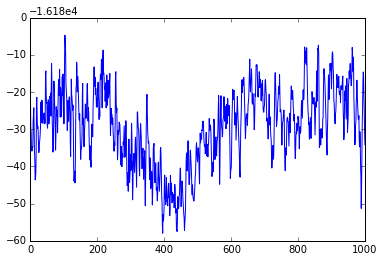

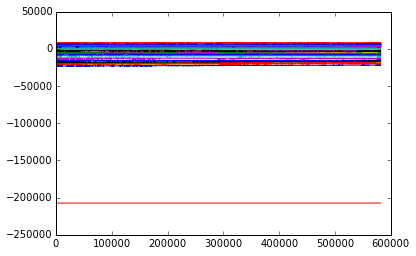

In [5]:
# let's see a single channel of eeg data
plt.plot(raw_data[0,0:fs])
plt.show()

# can you tell me how to plot more than one channel?
plt.plot(raw_data.T)
plt.show()

 Lets check the offset of channel 1, which is: -16201.8


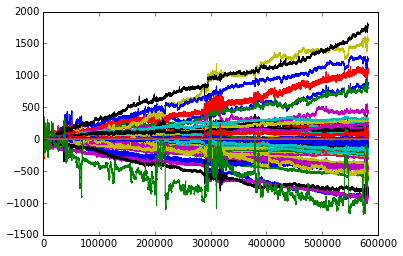

In [6]:
# we will remove the DC bias from all channels

print ' Lets check the offset of channel 1, which is:', raw_data[0,0]

# let's create a matrix where we will store the data without an offset:
raw_data_no_offset = np.zeros(raw_data.shape)

for channel in range(67):
    raw_data_no_offset[channel, :] = raw_data[channel,:] - raw_data[channel,0]

plt.plot(raw_data_no_offset.T)
plt.show()


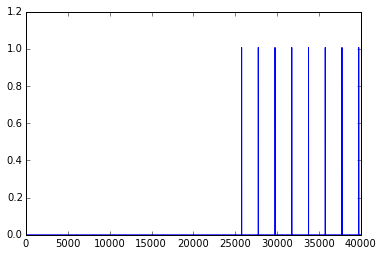

the shape of stim_idx is:  (1, 746)
The first 30 indices where stimli arrive are:  [35764 35765 35766 37756 37757 37758 39756 39757 39758 41756 41757 41758
 43756 43757 43758]


In [7]:
# let's epoch the data

# first,let's identify where the stimuli are
# as a first approximation, let's plot the stim channel

# let's just plot the first 10 seconds
plt.plot(raw_data_no_offset[stim_chan,fs*10:fs*50])
plt.show()
# we need to zoom in to the samples where the entry and exit of stimuli 
# becomes more visually eident

# let's isolate the indices where the triggers come in
stim_idx = np.asarray(np.where(raw_data_no_offset[stim_chan] > 1))

print 'the shape of stim_idx is: ', stim_idx.shape
print 'The first 30 indices where stimli arrive are: ', stim_idx[0,0:15]

In [15]:
# we know that the data has shape raw_data_no_offset.shape

# the first thing we should do, is to count how many stim we have!

stim_list = []
for index in range(1,stim_idx.shape[1]):
    if stim_idx[0,index] > (stim_idx[0,index-1]+5):
        stim_list.append(stim_idx[0,index])
        
stim_count = len(stim_list)

print 'The shape of stim_list is: ', type(stim_list)
print 'The indices for the first 10 stim are: ', stim_list[0:10]
print stim_count

 The shape of stim_list is:  <type 'list'>
The indices for the first 10 stim are:  [37756, 39756, 41756, 43756, 45756, 47755, 49755, 51755, 53755, 55755]
247


In [23]:
# now we will finally epoch the data

# we pick these parameters based on what we want to see in the data
pre_stim = 200
post_stim = 1800

epoched_data = np.zeros([nchan,stim_count,pre_stim+post_stim])

for stim_num, stim in enumerate(stim_list):
    epoched_data[:,stim_num,:] = raw_data_no_offset[0:nchan,(stim-pre_stim):(stim+post_stim)]

Plotting data for channel  49  and epoch number  98
Dimensions before squeezing: (2000,)
Dimensions after squeezing: (2000,)


/Users/iranroman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 64 + 1) instead
  app.launch_new_instance()
/Users/iranroman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated. Please call randint(1, 247 + 1) instead


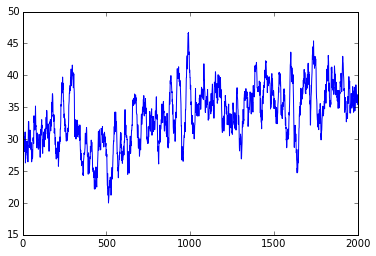

In [35]:
# sanity check, let's plot some datapoints

rand_chan = np.random.random_integers(nchan)
rand_epoch = np.random.random_integers(stim_count)

print 'Plotting data for channel ', rand_chan, ' and epoch number ', rand_epoch 

print 'Dimensions before squeezing:', epoched_data[rand_chan,rand_epoch,:].shape
print 'Dimensions after squeezing:', np.squeeze(epoched_data[rand_chan,rand_epoch,:]).shape

plt.plot(epoched_data[rand_chan,rand_epoch,:])
plt.show()

In [39]:
# The next step, is to rmove the DC offset from each one of our epochs

# we have a stimulus, arriving at 200 ms into our epoch. All epochs have a DC offset associated with it
# we want DC to be 0 at the time that the stim came in. Therefore, grab a window of 20 ms before the
# actual onset of the stimulus, average the values in this window, and remove that DC component from the 
# entire epoch.

stim_arrival = 200

baseline_period = range(180,200)

epoched_data_basel_corr = np.zeros(epoched_data.shape)

for chan in range(nchan):
    for epoch in range(epoched_data.shape[1]):
        epoched_data_basel_corr[chan,epoch,:] = epoched_data[chan,epoch,:] - np.mean(epoched_data[chan,epoch,baseline_period])

Plotting data for channel  56  and epoch number  52


/Users/iranroman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 64 + 1) instead
  app.launch_new_instance()
/Users/iranroman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated. Please call randint(1, 247 + 1) instead


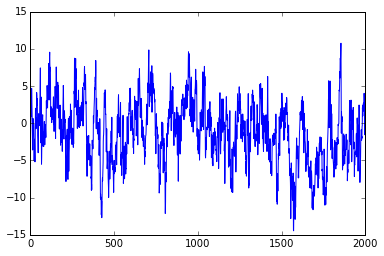

In [49]:
# sanity check, let's plot some datapoints

rand_chan = np.random.random_integers(nchan)
rand_epoch = np.random.random_integers(stim_count)

print 'Plotting data for channel ', rand_chan, ' and epoch number ', rand_epoch 
plt.plot(epoched_data_basel_corr[rand_chan,rand_epoch,:])
plt.show()

In [64]:
# Now we will eliminate noisy stimuli trials, by cancelling trials with absolute amplitudes greater than 100

amp_limit = 100

bad_epoch_idx = [] 

# print epoched_data_basel_corr[1:10,epoch,1:10]

# we will iterate over all the epochs, which are one of the dimensions in our matrix
# and we will look at all the samples and all the channels simultaneously
for epoch in range(epoched_data_basel_corr.shape[1]):
    
    if np.max(np.abs(epoched_data_basel_corr[:,epoch,:])) > amp_limit:
        bad_epoch_idx.append(epoch)
                    
clean_epoched_data = epoched_data_basel_corr
            
clean_epoched_data = np.delete(clean_epoched_data, np.asarray(bad_epoch_idx), 1)

print 'The shape of epoched_data_basel_corr is:', epoched_data_basel_corr.shape 
print 'The shape of clean_epoched_data is:', clean_epoched_data.shape 


The shape of epoched_data_basel_corr is: (64, 247, 2000)
The shape of clean_epoched_data is: (64, 221, 2000)


This is the ERP as recorded in electrode FCz


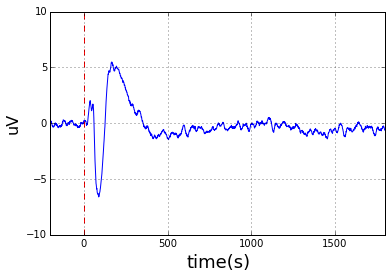

In [83]:
# WE HAVE ARRIVED! This is the finishline

ERPs = np.mean(clean_epoched_data, axis=1)

print 'This is the ERP as recorded in electrode FCz'
            
FCz = 18

# this time linspace, will help us plot the x axis, as starting 200 ms before the onset of the stimulus, which is at 0
time = np.linspace(-200,1799,2000)

plt.plot(time,ERPs[FCz,:])
plt.xlim([-200,1799])
plt.ylim([-10,10])
plt.xlabel('time(s)', fontsize=18)
plt.ylabel('uV', fontsize=16)
plt.plot((0, 0), (-10, 10), 'r--')
plt.grid()
plt.show()  

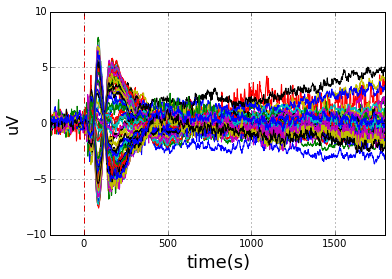

In [84]:
# let's look at all the electrodes at once!

plt.plot(time,ERPs.T)
plt.xlim([-200,1799])
plt.ylim([-10,10])
plt.xlabel('time(s)', fontsize=18)
plt.ylabel('uV', fontsize=16)
plt.plot((0, 0), (-10, 10), 'r--')
plt.grid()
plt.show()  
plt.show()